In [1]:
import pandas as pd
import numpy as np 


In [2]:
df=pd.read_csv('athlete_events.csv')
region_df=pd.read_csv('noc_regions.csv')
print(df.shape)
print(region_df.shape)
df.head()

(271116, 15)
(230, 3)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df=df[df['Season']=='Summer']
print(df.shape)

(222552, 15)


In [4]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df=df.merge(region_df[['NOC','region']],on='NOC',how='left')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands


In [6]:
df['region'].unique().shape

(206,)

In [7]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
dtype: int64

In [8]:
df.duplicated().sum()

1385

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [12]:
pd.get_dummies(df['Medal'],dtype=int)

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [13]:
df=pd.concat([df,pd.get_dummies(df['Medal'],dtype=int)],axis=1)

In [14]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [15]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','City','Sport','Event','Medal'])

In [16]:
medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,1035,802,708
1,URS,394,317,294
2,GBR,278,317,300
3,GER,235,261,283
4,FRA,234,256,287
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [17]:
years=df['Year'].unique().tolist()

In [18]:
years.sort()

In [19]:
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [20]:
years.insert(0,'Overall')
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [21]:
countries=df['region'].dropna().unique().tolist()

In [22]:
countries.sort()

In [23]:
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [24]:
countries.insert(0,'Overall')

In [25]:
countries

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [26]:
def fetch_medal(df,year,country):
    medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','City','Sport','Event','Medal'])
    flag=0 
    if year=='Overall' and country == 'Overall':
        tempdf=medal_tally 
    if year == 'Overall' and country != 'Overall':
        flag=1
        tempdf=medal_tally[medal_tally['region']==country]  
    if year !='Overall' and country == 'Overall':
        tempdf=medal_tally[medal_tally['Year']==year] 
    if year !='Overall' and country!='Overall':
        tempdf=medal_tally[(medal_tally['Year']==year)&(medal_tally['region']==country)]
    
    if flag==1:
        x= tempdf.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x= tempdf.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False)

    x['total']=x['Gold']+x['Silver']+x['Bronze']
    
    return x
    

In [27]:
fetch_medal(df,2008,'USA')

,Gold,Silver,Bronze,total
region,,,,
USA,36,39,35,110


In [28]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,0,0


In [29]:
df['Year'].unique().shape[0]-1

28

In [30]:
df['City'].unique().shape[0]

23

In [31]:
df['Sport'].unique().shape[0]

52

In [32]:
df['Event'].unique().shape[0]

651

In [33]:
df['Name'].unique().shape[0]

116122

In [34]:
df['NOC'].unique().shape[0]

230

In [35]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,0,0


In [36]:
df.groupby('Year')['region'].unique().reset_index()['region']

0     [Greece, UK, Switzerland, USA, Germany, France...
1     [Denmark, Germany, USA, France, Austria, Norwa...
2     [USA, Canada, Italy, Germany, Cuba, France, UK...
3     [Greece, Germany, UK, Finland, Italy, Denmark,...
4     [Italy, Germany, UK, USA, Sweden, Denmark, Aus...
5     [Finland, Norway, Sweden, Germany, UK, Luxembo...
6     [Denmark, Finland, Norway, Egypt, UK, Sweden, ...
7     [Finland, Norway, Bulgaria, Chile, Switzerland...
8     [Norway, Egypt, USA, India, Switzerland, Germa...
9     [Netherlands, USA, Belgium, France, Philippine...
10    [Estonia, Norway, Hungary, Italy, Egypt, Japan...
11    [Finland, Norway, Iran, Egypt, Pakistan, Monac...
12    [Finland, Norway, Egypt, France, Pakistan, Mon...
13    [Norway, France, Bulgaria, South Africa, Afgha...
14    [Norway, Bulgaria, Syria, Sudan, Iraq, Pakista...
15    [Russia, Iraq, Egypt, Tanzania, Pakistan, Swed...
16    [Norway, Cameroon, Mexico, Sudan, Malaysia, Ni...
17    [Norway, Sudan, Nigeria, Chad, Tanzania, K

In [37]:
nations_over_years=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [38]:
nations_over_years

,Year,count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [39]:
!pip install plotly


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [40]:
import plotly.express as px

In [41]:
fig=px.line(nations_over_years,x='Year',y='count')
fig.show()

In [42]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,0,0,0


In [43]:
events_over_years=df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')

In [44]:
events_over_years

,Year,count
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [45]:
x=df.drop_duplicates(['Year','Sport','Event'])

In [46]:
import matplotlib.pyplot as plt

In [47]:
x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int)

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,...,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,...,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Year', ylabel='Sport'>

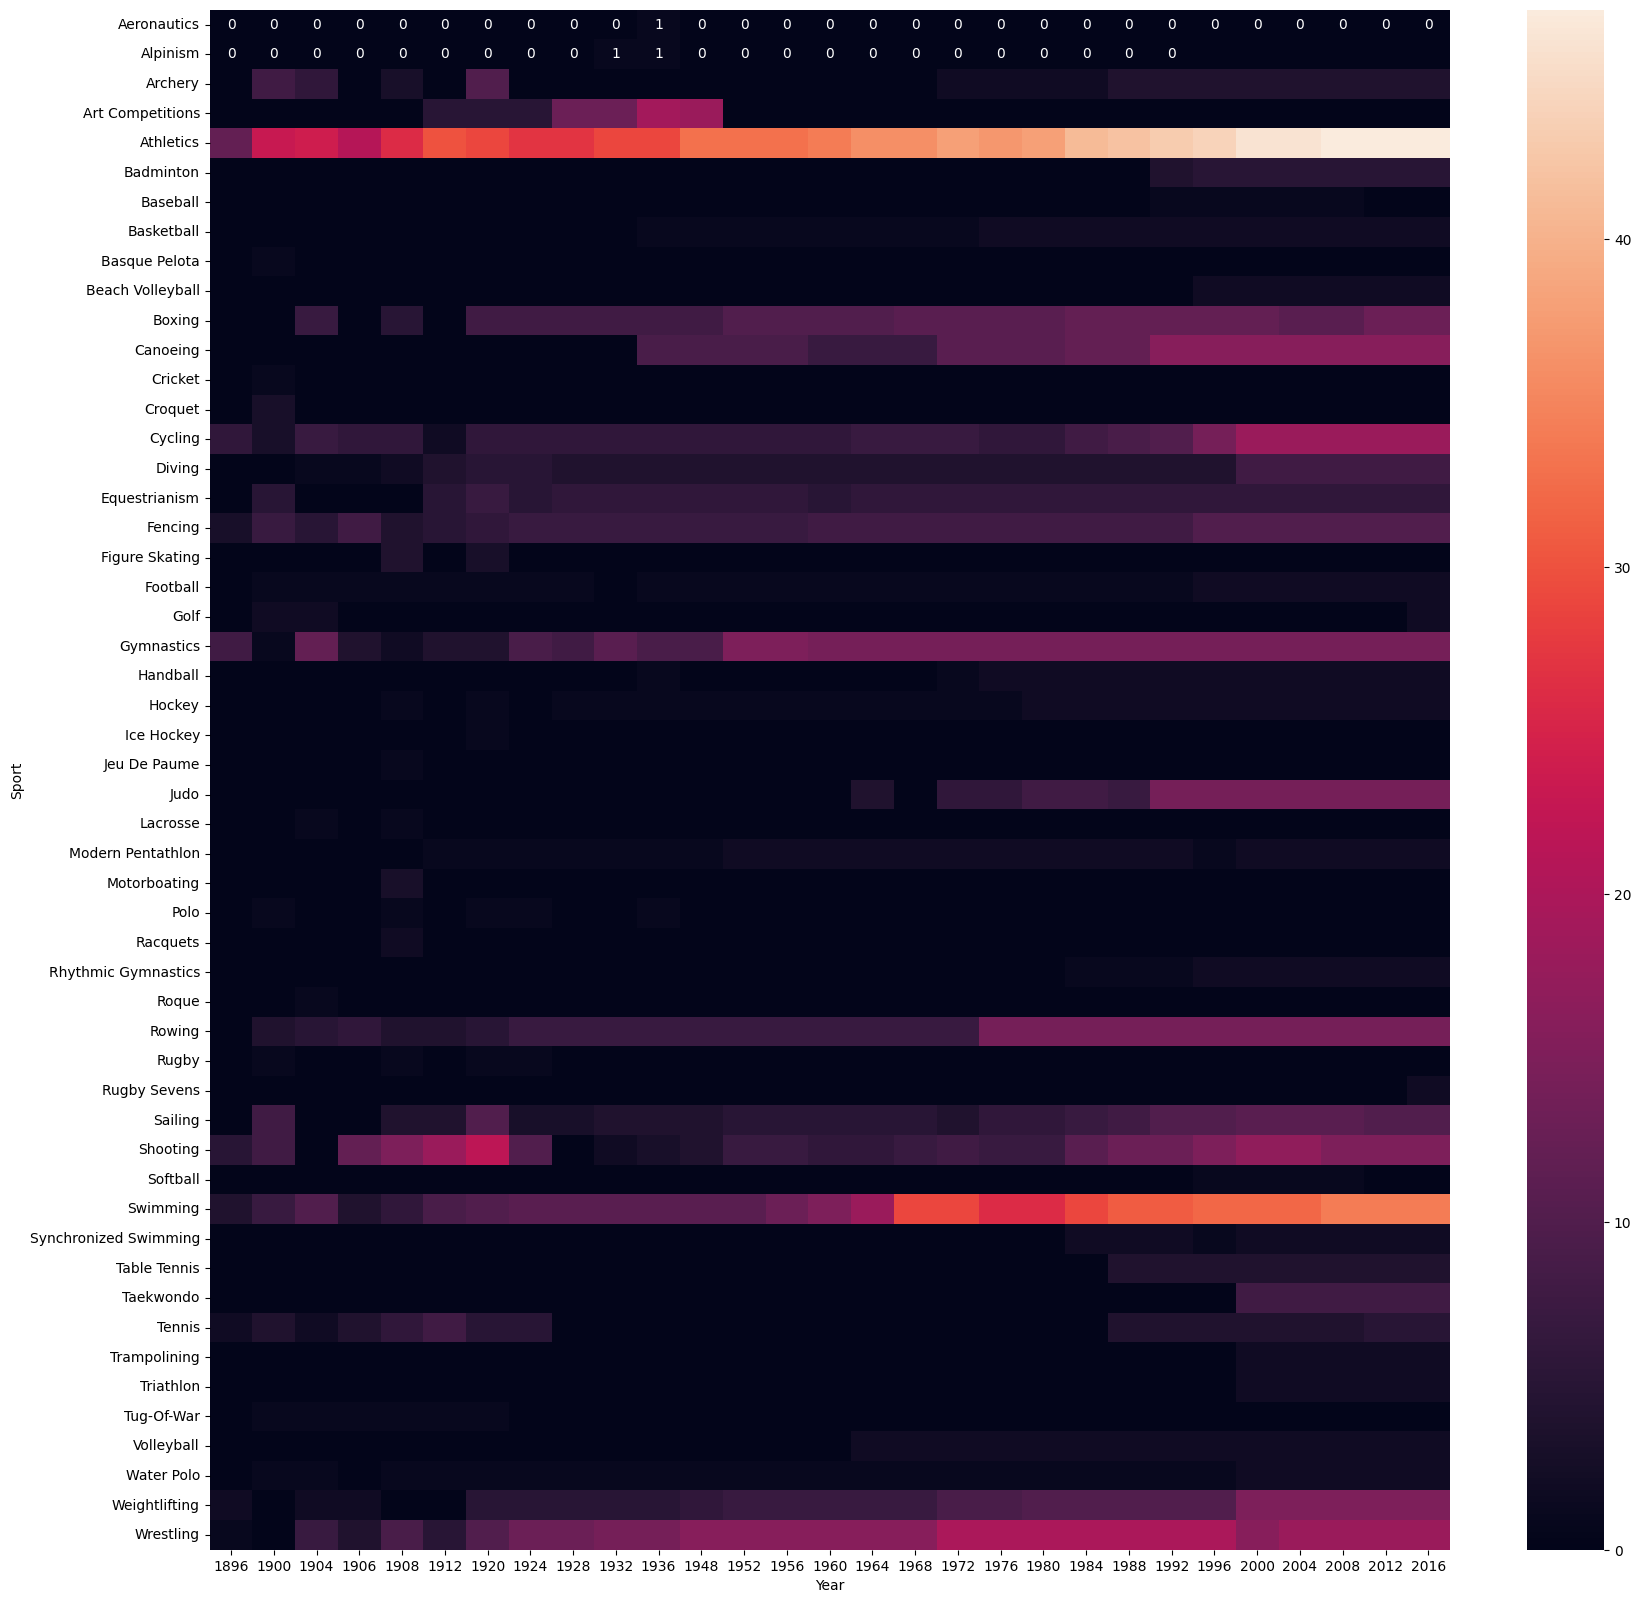

In [48]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int),annot=True)

In [49]:
temp_df= df.dropna(subset=['Medal'])
a=temp_df['Name'].value_counts().reset_index().merge(df,how='outer')
a=a.dropna(subset=['Medal'])
a=a[['Name','count','Sport','region']].drop_duplicates(subset=['Name'])
a.isna().sum()


Name      0
count     0
Sport     0
region    5
dtype: int64

In [50]:
x=temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='count',how='left')[['index','Name_x','Sport','region']].drop_duplicates('index')



KeyError: 'count'

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,0,0,0


In [51]:
def most_successful(df,sport):
    temp_df= df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df=temp_df[temp_df['Sport']==sport] 
    x=temp_df['Name'].value_counts().reset_index().merge(df,how='outer').dropna(subset=['Medal'])[['Name','count','Sport','region']].drop_duplicates(subset=['Name'])
    x=x.dropna(subset=['count'])
    x['count']=x['count'].astype(int)
    return x

In [52]:
most_successful(df,'Overall')

,Name,count,Sport,region
1,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
50,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
74,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
100,Takashi Ono,13,Gymnastics,Japan
...,...,...,...,...
63079,Joel Isasi Gonzlez,1,Athletics,Cuba
63082,Florena Andreea Isrescu,1,Gymnastics,Romania
63085,Ryoji Isaoka,1,Weightlifting,Japan
63088,Preben Isaksson,1,Cycling,Denmark


In [53]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,0,0


In [54]:
y=df.dropna(subset=['Medal'])
y.drop_duplicates(subset=['Team','NOC','Games','Year','Season','City','Sport','Event','Medal'],inplace=True)
z=y[y['region']=='Afghanistan']
f=z.groupby('Year')['Medal'].count().reset_index()
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    2 non-null      int64
 1   Medal   2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


/var/folders/3p/h8kz34v52h9fxz8q4sn11vxw0000gn/T/ipykernel_7618/1889461907.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
fig=px.line(f,x='Year',y='Medal')
fig.show()

In [56]:
s.value_counts()

NameError: name 's' is not defined

<Axes: xlabel='Year', ylabel='Sport'>

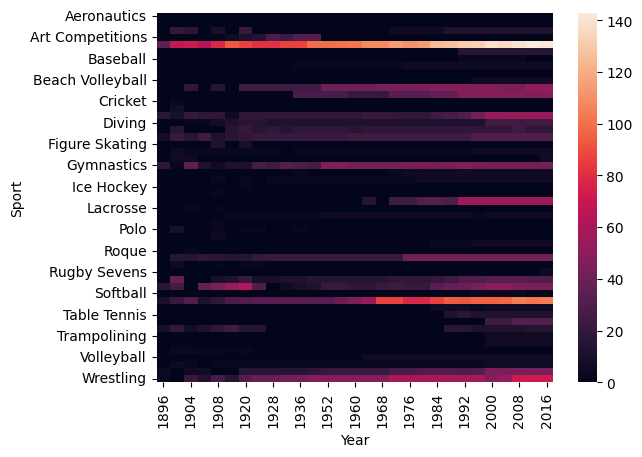

In [57]:
sns.heatmap(y.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype(int))

In [58]:
z=y[y['region']=='Bangladesh']
plt.figure(figsize=(20,20))
sns.heatmap(z.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype(int))


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 2000x2000 with 0 Axes>

In [59]:
def most_successful_regions(df,country):
    temp_df= df.dropna(subset=['Medal'])
    temp_df=temp_df[temp_df['region']==country] 
    x=temp_df['Name'].value_counts().reset_index().merge(df,how='outer').dropna(subset=['Medal'])[['Name','count','Sport']].drop_duplicates(subset=['Name'])
    x=x.dropna(subset=['count'])
    x['count']=x['count'].astype(int)
    return x

In [60]:
most_successful_regions(df,'USA')

,Name,count,Sport
1,"Michael Fred Phelps, II",28,Swimming
30,Ryan Steven Lochte,12,Swimming
45,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming
61,Natalie Anne Coughlin (-Hall),12,Swimming
73,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming
...,...,...,...
7460,"Ronald Allen ""Ronnie"" Harris",1,Boxing
7461,George Prifold Harrison,1,Swimming
7462,"Kerry Lorenzo ""Kenny"" Harrison",1,Athletics
7464,"Edward James ""Eddie"" Hart",1,Athletics


In [61]:
athletes=df.drop_duplicates(subset=['Name','region'])

In [62]:
import plotly.figure_factory as ff
import scipy

In [65]:
x1=athletes['Age'].dropna() 
x2=athletes[athletes['Medal']=='Gold']['Age'].dropna()
x3=athletes[athletes['Medal']=='Silver']['Age'].dropna()
x4=athletes[athletes['Medal']=='Bronze']['Age'].dropna()

In [66]:
fig=ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [68]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,0,0,0


In [76]:
sports=df['Sport'].unique()[:30].tolist()

In [77]:
sports

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Modern Pentathlon',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball']

In [78]:
x=[]
name=[]
for i in sports:
    t=athletes[athletes['Sport']==i]
    x.append(t[t['Medal']=='Gold']['Age'].dropna())
    name.append(i)

In [80]:
fig1=ff.create_distplot(x,name,show_hist=False,show_rug=False)
fig1.show()

In [82]:
athletes['Medal'].fillna('No Medal',inplace=True)

/Users/rosireddyvangala/.local/share/virtualenvs/Olympics_anlaysis-U-_q_Kut/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/rosireddyvangala/.local/share/virtualenvs/Olympics_anlaysis-U-_q_Kut/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/rosireddyvangala/.local/share/virtualenvs/Olympics_anlaysis-U-_q_Kut/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/rosireddyvangala/.local/share/virtualenvs/Olympics_anlaysis-U-_q_Kut/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated an

<Axes: xlabel='Weight', ylabel='Height'>

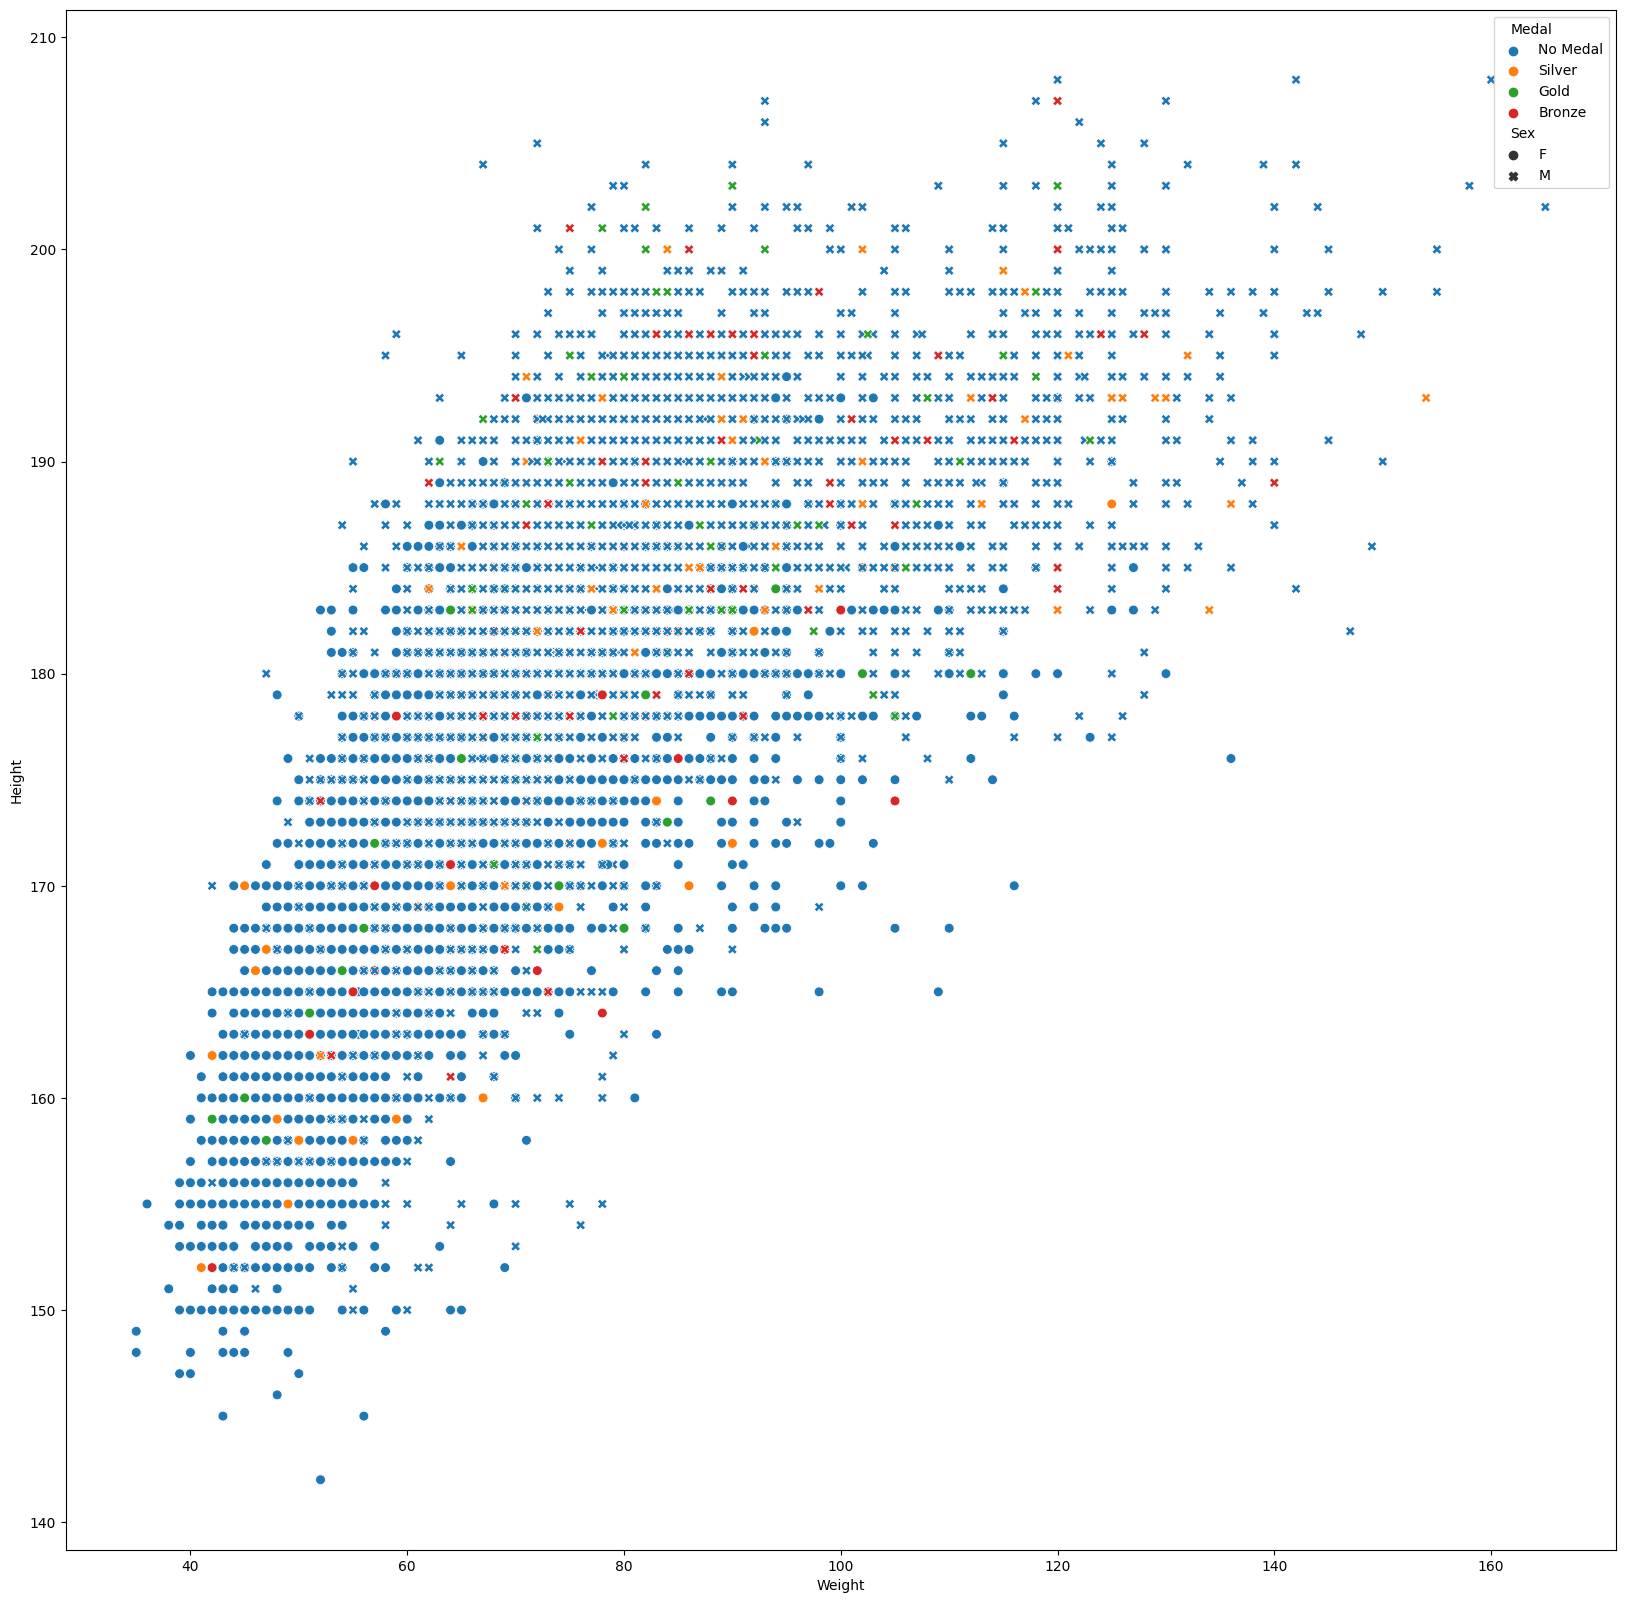

In [102]:
plt.figure(figsize=(20,20))
tdf=athletes[athletes['Sport']=='Athletics']
sns.scatterplot(data=tdf,x='Weight',y='Height',hue='Medal',style='Sex',s=50)

In [92]:
tdf

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,Silver
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal,Netherlands,0,0,0
31,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,No Medal,Finland,0,0,0
44,31,Evald rma (rman-),M,24.0,174.0,70.0,Estonia,EST,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Pole Vault,No Medal,Estonia,0,0,0
45,32,Olav Augunson Aarnes,M,23.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's High Jump,No Medal,Norway,0,0,0
48,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",No Medal,France,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222515,135544,Krzysztof Zwoliski,M,21.0,175.0,70.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Men's 100 metres,No Medal,Poland,0,0,0
222520,135547,Viktoriya Viktorovna Zyabkina,F,19.0,174.0,62.0,Kazakhstan,KAZ,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 200 metres,No Medal,Kazakhstan,0,0,0
222526,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold,Russia,0,1,0
222542,135561,Frantiek Zyka,M,26.0,NaN,NaN,Czechoslovakia,TCH,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's Marathon,No Medal,Czech Republic,0,0,0


In [103]:
men=athletes[athletes['Sex']=='M'].groupby('Year')['Name'].count().reset_index()
women=athletes[athletes['Sex']=='F'].groupby('Year')['Name'].count().reset_index()

In [106]:
men

,Year,Name
0,1896,174
1,1900,1181
2,1904,629
3,1906,759
4,1908,1772
5,1912,1978
6,1920,2280
7,1924,2535
8,1928,2342
9,1932,1382


In [107]:
women

,Year,Name
0,1900,23
1,1904,6
2,1906,6
3,1908,44
4,1912,53
5,1920,73
6,1924,132
7,1928,285
8,1932,162
9,1936,316


In [113]:
final=men.merge(women,on='Year')
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)

In [114]:
final

,Year,Male,Female
0,1900,1181,23
1,1904,629,6
2,1906,759,6
3,1908,1772,44
4,1912,1978,53
5,1920,2280,73
6,1924,2535,132
7,1928,2342,285
8,1932,1382,162
9,1936,3539,316


In [115]:
fig=px.line(final,x='Year',y=['Male','Female'])
fig.show()